In [12]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes 

### Some handy practise

In [4]:
durations = [5,6,6,2.5,4,4]
event_observed = [1, 0, 0, 1, 1, 1]

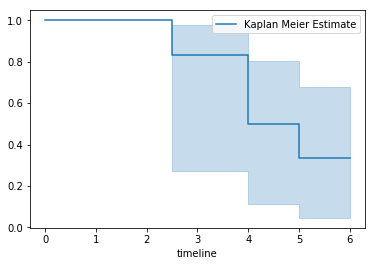

In [9]:
kaplan_meier = KaplanMeierFitter()

# Fit the data into object
kaplan_meier.fit(durations, event_observed, label='Kaplan Meier Estimate')

kaplan_meier.plot();

### Use real-world data to play with Kaplan Meier Fitter

In [13]:
df = pd.read_excel('../data/WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [15]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6347,7718-RXDGG,Male,0,Yes,No,15,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),68.6,1108.6,No
2849,6838-HVLXG,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.3,246.7,No
6944,9039-ZVJDC,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.1,53.05,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [25]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = pd.get_dummies(df['Churn'], drop_first=True)
df['TotalCharges'] = df['TotalCharges'].fillna(value=df['TotalCharges'].median())

Create categorical columns

In [34]:
categorical_cols = [i for i in df.columns if df[i].dtype == 'object']
categorical_cols.remove('customerID')

In [24]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3660,2259-OUUSZ,Male,0,No,No,7,No,No phone service,DSL,No,...,Yes,Yes,No,No,One year,Yes,Credit card (automatic),35.50,249.55,0
1772,7198-GLXTC,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,79.00,143.65,1
4149,6559-ILWKJ,Male,0,Yes,No,71,No,No phone service,DSL,No,...,No,No,Yes,Yes,Two year,No,Electronic check,49.35,3515.25,1


In [44]:
for i in categorical_cols:
    print(f'Column Name: {i}, \n{df[i].value_counts()}\n{"-"*50}')

Column Name: gender, 
Male      3555
Female    3488
Name: gender, dtype: int64
--------------------------------------------------
Column Name: Partner, 
No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------------------------------------
Column Name: Dependents, 
No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------------------------------------
Column Name: PhoneService, 
Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------------------------------------
Column Name: MultipleLines, 
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
--------------------------------------------------
Column Name: InternetService, 
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
--------------------------------------------------
Column Name: OnlineSecurity, 
No                     3498
Yes                    2019
No internet service    

Populating the interactive namespace from numpy and matplotlib


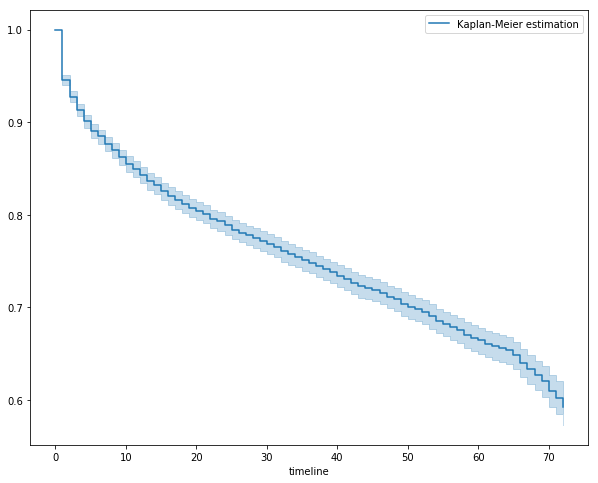

In [52]:
durations = df['tenure']
event_observed = df['Churn']
kaplan_meier = KaplanMeierFitter()
kaplan_meier.fit(durations, event_observed, label='Kaplan-Meier estimation')

%pylab inline
figsize(10,8)

kaplan_meier.plot();

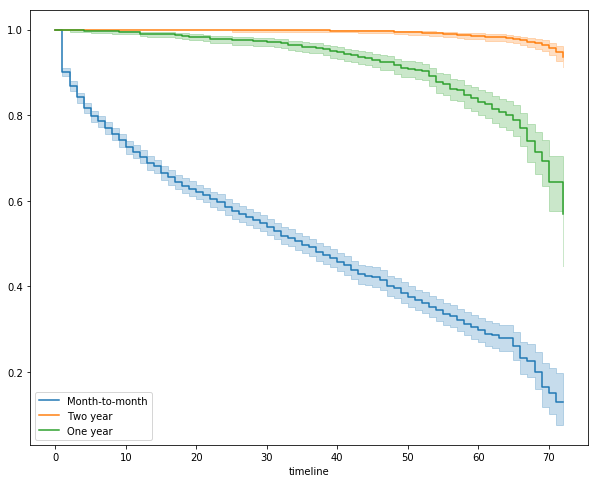

In [54]:

kmf = KaplanMeierFitter() 


T = df['tenure']     ## time to event
E = df['Churn']      ## event occurred or censored
groups = df['Contract']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 'Month-to-month')   ## Cohort 1
ix2 = (groups == 'Two year')         ## Cohort 2
ix3 = (groups == 'One year')         ## Cohort 3

kmf.fit(T[ix1], E[ix1], label='Month-to-month')
ax = kmf.plot()
kmf.fit(T[ix2], E[ix2], label='Two year')         
ax1 = kmf.plot(ax=ax)
kmf.fit(T[ix3], E[ix3], label='One year')        
kmf.plot(ax=ax1)   

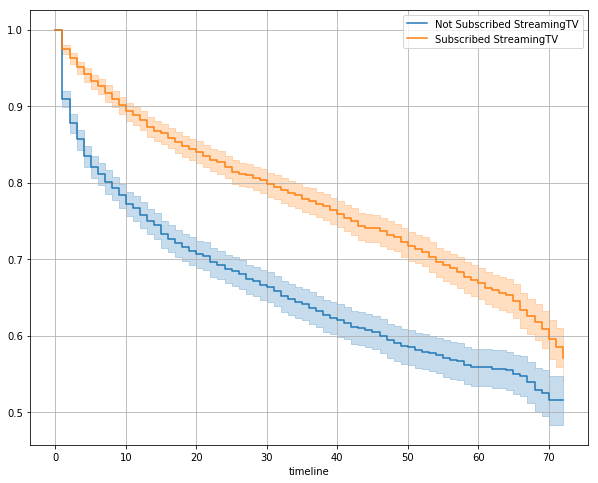

In [58]:
kmf = KaplanMeierFitter() 

groups = df['StreamingTV']   
i1 = (groups == 'No')     
i2 = (groups == 'Yes')

kmf.fit(T[i1], E[i1], label='Not Subscribed StreamingTV')
a1 = kmf.plot()

kmf.fit(T[i2], E[i2], label='Subscribed StreamingTV')
kmf.plot(ax=a1, grid=True);